* **작성자** : 김종원
* 날짜 : 2021.10.06

## 과제 주제

이디야 커피는 가끔 스타벅스 커피 매장이 위차하는 곳에 매장을 위치시키는 것이 아니냐는 의심을 받곤 합니다. 공식적인 인터뷰에서 이디야 커피 회장은 이 사실을 부인했습니다. 그래서 이 사실에 대해서 데이터 수집해 분석을 하고자 합니다.

### 목차
* 1. 데이터 수집 (서울시 한정)
    - 스타벅스 가게 위치 정보 수집
    - 이디야 가게 위치 정보 수집
* 2. 데이터 분석

---

## 문제 1번
서울시의 스타벅스 매장의 이름과 주소, 구 이름을 pandas data frame으로 정리해 두세요.
* [스타벅스](https://www.starbucks.co.kr/store/store_map.do) 링크 정보

**방법론**

서울시의 구를 선택하는 화면까지는 셀레니움으로 진행하고 구별 매장의 위치는 Beautiful soup으로 가지고 올 것이다.


### 1) 모듈 임포트

In [ ]:
from selenium import webdriver
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
import time

## 3번
import json
import requests
import folium

# 한글 설정.
import matplotlib.pyplot as plt
import platform
import seaborn as sns 
from matplotlib import font_manager, rc 

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

### 2) 데이터 수집 

In [ ]:
starbucksUrl = "https://www.starbucks.co.kr/store/store_map.do"

driver = webdriver.Chrome("../driver/chromedriver") # windows .exe 
driver.get(starbucksUrl)

In [ ]:
# 화면 최대화 
driver.maximize_window() 

In [ ]:
# 지역 검색 버튼
localSearchXpath = '''//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a'''
driver.find_element_by_xpath(localSearchXpath).click()

In [ ]:
# 시도 정보 가져오기
sidoBox = driver.find_element_by_class_name("sido_arae_box")

# 서울을 선택
for sd in sidoBox.find_elements_by_css_selector("li > a"):
    if sd.text.strip() == "서울":   sd.click()

In [ ]:
gugunBox = driver.find_element_by_id("mCSB_2_container")
gugunBox

<selenium.webdriver.remote.webelement.WebElement (session="22b60edc7a5e79bc071bc7df5315f1c6", element="5ed03f79-16e8-43b0-b5d3-09611e3e02ba")>

In [ ]:
gugunList = gugunBox.find_elements_by_css_selector("ul > li")
for gugun in gugunList:
    if gugun.text.strip() =="전체":
        gugun.click()
time.sleep(2)

In [ ]:
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")

In [ ]:
content = soup.find(id="mCSB_3_container")

In [ ]:
contents = content.find_all("li")

In [ ]:
from tqdm import tqdm_notebook

In [ ]:
starbucksList = []
p = re.compile("\s.{1,3}구")
for i in tqdm_notebook(range(len(contents))):
    lat = contents[i]["data-lat"]
    lng = contents[i]["data-long"]
#     name = contents[i]["data-name"]
#     code = contents[i]["data-code"]
#     storecd = contents[i]["data-storecd"]
    # 가게이름
#     print(contents[i].find("strong").text)
    storeName = contents[i].find("strong").text.strip()
    # 주소
    address = contents[i].find("p",class_="result_details").text.replace("1522-3232","")
    # 구정보
    gu = p.search(address).group().strip()
    starbucksList.append([storeName,gu,address,lat,lng])

C:\Users\jongwon\AppData\Local\Temp/ipykernel_18624/535926129.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(contents))):


  0%|          | 0/566 [00:00<?, ?it/s]

### 3) 수집 후 Data Frame으로 변환 및 저장.

In [ ]:
df_starbucks = pd.DataFrame(starbucksList,columns=["매장이름","구","주소","위도","경도"])

In [ ]:
## csv 파일로 데이터 저장.
df_starbucks.to_csv("서울시 스타벅스.csv",encoding="utf-8-sig",index=False)

In [ ]:
df = pd.read_csv("서울시 스타벅스.csv")
df

,매장이름,구,주소,위도,경도
0,역삼아레나빌딩,강남구,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069
1,논현역사거리,강남구,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223
2,신사역성일빌딩,강남구,서울특별시 강남구 강남대로 584 (논현동),37.514132,127.020563
3,국기원사거리,강남구,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495
4,스탈릿대치R,강남구,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583
...,...,...,...,...,...
561,사가정역,중랑구,서울특별시 중랑구 면목로 310,37.579594,127.087966
562,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동),37.596890,127.086470
563,묵동이마트,중랑구,"서울특별시 중랑구 동일로 932 (묵동, 묵동자이아파트) (묵동이마트 B1층)",37.613433,127.077484
564,묵동,중랑구,서울특별시 중랑구 동일로 952,37.615368,127.076633


## 문제 2번
서울시의 이디야 매장의 이름과 주소, 구 이름을 pandas data frame으로 정리해 두세요.
* [이디야](https://www.ediya.com/contents/find_store.html#c) 링크 정보

**방법론**

이디야 매장 검색에 주소 검색란에 '구'를 검색하여 그 안에 나온 매장 내역을 Beautiful soup으로 가지고 올 것이다.

### 1) 이디야 가게 정보 수집
* 1. **`서울시 구`** 정보 획득

In [ ]:
# 스타벅스를 통해 서울시 구 정보를 guInfo 변수에 저장한다.
guInfo = df_starbucks["구"].unique()
print(guInfo)

['강남구' '강북구' '강서구' '관악구' '광진구' '금천구' '노원구' '도봉구' '동작구' '마포구' '서대문구' '서초구'
 '성북구' '송파구' '양천구' '영등포구' '은평구' '종로구' '중구' '강동구' '구로구' '동대문구' '성동구' '용산구'
 '중랑구']


* 2. 셀레니움과 Beautiful Soup으로 데이터 수집.

In [ ]:
EDIYAUrl = "https://www.ediya.com/contents/find_store.html#c"

driver = webdriver.Chrome("../driver/chromedriver") # windows .exe 
driver.get(EDIYAUrl)

In [ ]:
# 주소 검색 버튼 클릭
addressSearchXpath = '''//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a'''
driver.find_element_by_xpath(addressSearchXpath).click()

In [ ]:
blank = driver.find_element_by_id("keyword_div")

In [ ]:
# 검색 입력란
InputBox = blank.find_element_by_css_selector("form > input")
# 검색 버튼 정보
InputButton = blank.find_element_by_css_selector("form > button")

In [ ]:
EdiyaList = []
for gu in tqdm_notebook(guInfo):
    InputBox.clear()
    # 주소 입력
    InputBox.send_keys(f"서울 {gu}")
    # 주소 입력이 완료 됐다면 검색 버튼 클릭.
    InputButton.click()
    time.sleep(8)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    placeList = soup.find(id="placesList")
    print("해당 {} 구의 이디야 매장 수 : {}".format(gu,len(placeList.find_all("li",class_="item"))))
    placeLists = placeList.find_all("li",class_="item")
    for j in range(len(placeLists)):
        # 이름
        name = placeLists[j].find("dl").find("dt").text.strip()
        # 주소
        address = placeLists[j].find("dl").find("dd").text.strip()
        EdiyaList.append([name,gu,address])

C:\Users\jongwon\AppData\Local\Temp/ipykernel_18624/1614817490.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(guInfo):


  0%|          | 0/25 [00:00<?, ?it/s]

해당 강남구 구의 이디야 매장 수 : 45
해당 강북구 구의 이디야 매장 수 : 20
해당 강서구 구의 이디야 매장 수 : 47
해당 관악구 구의 이디야 매장 수 : 29
해당 광진구 구의 이디야 매장 수 : 24
해당 금천구 구의 이디야 매장 수 : 24
해당 노원구 구의 이디야 매장 수 : 31
해당 도봉구 구의 이디야 매장 수 : 23
해당 동작구 구의 이디야 매장 수 : 23
해당 마포구 구의 이디야 매장 수 : 39
해당 서대문구 구의 이디야 매장 수 : 21
해당 서초구 구의 이디야 매장 수 : 30
해당 성북구 구의 이디야 매장 수 : 32
해당 송파구 구의 이디야 매장 수 : 40
해당 양천구 구의 이디야 매장 수 : 27
해당 영등포구 구의 이디야 매장 수 : 41
해당 은평구 구의 이디야 매장 수 : 26
해당 종로구 구의 이디야 매장 수 : 31
해당 중구 구의 이디야 매장 수 : 29
해당 강동구 구의 이디야 매장 수 : 25
해당 구로구 구의 이디야 매장 수 : 29
해당 동대문구 구의 이디야 매장 수 : 22
해당 성동구 구의 이디야 매장 수 : 23
해당 용산구 구의 이디야 매장 수 : 15
해당 중랑구 구의 이디야 매장 수 : 26


### 2) 수집 후 Data Frame으로 변환 및 저장.

In [ ]:
df_Ediya = pd.DataFrame(EdiyaList,columns=["매장이름","구","주소"])
df_Ediya.head()

,매장이름,구,주소
0,강남YMCA점,강남구,서울 강남구 논현동
1,강남구청역아이티웨딩점,강남구,"서울 강남구 학동로 338 (논현동, 강남파라곤)"
2,강남논현학동점,강남구,서울 강남구 논현로131길 28 (논현동)
3,강남대치점,강남구,"서울 강남구 역삼로 415 (대치동, 성진빌딩)"
4,강남도산점,강남구,서울 강남구 도산대로37길 20 (신사동)


In [ ]:
## csv 파일로 데이터 저장.
df_Ediya.to_csv("서울시 이디야.csv",encoding="utf-8-sig",index=False)

In [ ]:
df_Ediya = pd.read_csv("서울시 이디야.csv")
df_Ediya.head()

,매장이름,구,주소
0,강남YMCA점,강남구,서울 강남구 논현동
1,강남구청역아이티웨딩점,강남구,"서울 강남구 학동로 338 (논현동, 강남파라곤)"
2,강남논현학동점,강남구,서울 강남구 논현로131길 28 (논현동)
3,강남대치점,강남구,"서울 강남구 역삼로 415 (대치동, 성진빌딩)"
4,강남도산점,강남구,서울 강남구 도산대로37길 20 (신사동)


## 문제 3번

앞에서 한 결과를 가지고 이디야 커피와 스타벅스 커피 매장이 근처에 있는지 분석해보자.

    가설 : 이다야 커피는 과연 스타벅스 커피 주변에 위치해 있을것이다.

이 가설을 검증해보자.


**방법론**

* 1. 위도 정보 가져와서 물리적 위치 확인
* 2. folium으로 시각화하여 육안으로 확인

#### 1. 스타벅스 Map이 KaKao 맵이기에 KaKao API를 이디야 위도 정보를 가져오기.
* 1. 카카오 맵 API 설정.

참고 문헌 : (https://wooiljeong.github.io/python/kakao_local_api/)


In [ ]:
class KakaoLocalAPI:
    """
    Kakao Local API 컨트롤러
    """

    def __init__(self, rest_api_key):
        """
        Rest API키 초기화 및 기능 별 URL 설정
        """

        # REST API 키 설정
        self.rest_api_key = rest_api_key
        self.headers = {"Authorization": "KakaoAK {}".format(rest_api_key)}
        
        self.URL_01 = "https://dapi.kakao.com/v2/local/search/address.json"
        # 02 좌표-행정구역정보 변환
        self.URL_02 = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json"
        # 03 좌표-주소 변환
        self.URL_03 = "https://dapi.kakao.com/v2/local/geo/coord2address.json"
        # 04 좌표계 변환
        self.URL_04 = "https://dapi.kakao.com/v2/local/geo/transcoord.json"
        # 05 키워드 검색
        self.URL_05 = "https://dapi.kakao.com/v2/local/search/keyword.json"
        # 06 카테고리 검색
        self.URL_06 = "https://dapi.kakao.com/v2/local/search/category.json"
    def search_address(self, query, analyze_type=None, page=None, size=None):
        """
        01 주소 검색
        """
        params = {"query": f"{query}"}

        if analyze_type != None:
            params["analyze_type"] = f"{analyze_type}"

        if page != None:
            params['page'] = f"{page}"

        if size != None:
            params['size'] = f"{size}"

        res = requests.get(self.URL_01, headers=self.headers, params=params)
        document = json.loads(res.text)

        return document

* API가 가동되지는 확인.

In [ ]:
df_starbucks.loc[0]

매장이름                    역삼아레나빌딩
구                           강남구
주소      서울특별시 강남구 언주로 425 (역삼동)
위도                    37.501087
경도                   127.043069
Name: 0, dtype: object

In [ ]:
# rest_api_key = 'Rest API 입력' 
rest_api_key = '' 
kakao = KakaoLocalAPI(rest_api_key)

## Request
result_01 = kakao.search_address(df_starbucks.loc[0]["주소"])

result_01["documents"][0]["road_address"]["address_name"],result_01["documents"][0]["road_address"]["x"],result_01["documents"][0]["road_address"]["y"]

('서울 강남구 언주로 425', '127.043058269829', '37.5011172075922')

스타벅스 웹 페이지에서 가져온 정보와 kakao API를 통해 가져온 정보가 동일합니다. 그렇기에 카카오 API를 통해 이디야 매장에 대한 위도 정보를 가져옵니다.

1. 데이터 정제.
- 이디야 매장 주소 정보 기입이 잘못된 데이터에 대해서 카카오 맵에 검색을 통해 올바르게 수정.
- (신사동), 1,2층 등 주소에 부적합한 요소에 대해서 정규식을 통해 삭제.

2. KaKao API를 활용해 위도 정보 수집
- 데이터 정제가 끝난 상황에서 이디야 매장에 대한 위도 정보 수집.

#### 1. 데이터 정제

In [ ]:
# 잘못 기입한 데이터에 대해서 정제.
def processing(x):
    p = re.compile(".*[0-9]+")
    try:
        if p.search(x).group() !="":
            return True
        else:
            return False
    except AttributeError:
        return False

In [ ]:
# 잘못 입력된 이디야 매장 정보 추출.
Ediya_errors = df_Ediya[~df_Ediya["주소"].apply(lambda x: processing(x))]
Ediya_errors

,매장이름,구,주소
0,강남YMCA점,강남구,서울 강남구 논현동
14,도산사거리점,강남구,서울 강남구 논현동
26,압구정점,강남구,서울 강남구 신사동
153,동서울터미널점,광진구,서울 광진구 구의동
183,시흥동점,금천구,서울 금천구 시흥동
210,월계초교점,노원구,서울 노원구 월계동
307,독립문통일로점,서대문구,서울 서대문구 영천동
311,무악재역점,서대문구,서울 서대문구 홍제동
314,서대문점,서대문구,서울 서대문구 냉천동
325,홍제역점,서대문구,서울 서대문구 홍제동


위 매장 정보를 원본 그대로 kakao API에 호출한다면 엉뚱한 좌표를 알려줄것이다. 그렇기에 해당 매장 정보를 정확한 주소로 수정합니다.

* [카카오맵](https://map.kakao.com/) 링크

In [ ]:
# 잘못 입력된 정보 인덱스 정보를 변수에 저장한다.
errorIndexInfo = Ediya_errors.index

### 카카오 맵에서 잘못된 주소 정보를 검색해서 지번 주소를 가져옵니다.

검색 방법으로는 셀레니움을 활용해 검색란에 다음과 같이 검색할 수 있게 자동화 합니다.
* ex) 서울 광진구 구의동동서울터미널점 이디야

In [ ]:
Url = "https://map.kakao.com/"

driver = webdriver.Chrome("../driver/chromedriver") # windows .exe 
driver.get(Url)

In [ ]:
XPathGo = '''//*[@id="dimmedLayer"]'''
XPathGoB = driver.find_element_by_xpath(XPathGo)
XPathGoB.click()

In [ ]:
Ediya_errors["주소 지번"] = ""

XPathinput= '''//*[@id="search.keyword.query"]'''

inputaddr = driver.find_element_by_xpath(XPathinput)
box = driver.find_element_by_class_name("box_searchbar")

for i in range(len(errorIndexInfo)):
    inputaddr.clear()
#     time.sleep(1)
    content1 = df_Ediya.loc[errorIndexInfo[i],"주소"] + " "+ df_Ediya.loc[errorIndexInfo[i],"매장이름"] + " 이디야"
    print("보낼 내용 : ",content1)
    inputaddr.send_keys(content1)
    time.sleep(1)
    
    box.find_element_by_css_selector("button").click()
    time.sleep(2)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    cote = soup.find(id="info.search.place.list")
    number = cote.find("li",class_="PlaceItem").find("div",class_="info_item").find(class_="lot_number")["title"]
    print("number : ", number)
    number = number.split(" ")[-1]
    Ediya_errors.loc[errorIndexInfo[i],"주소 지번"] = number

C:\Users\jongwon\AppData\Local\Temp/ipykernel_18624/3439157111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ediya_errors["주소 지번"] = ""


보낼 내용 :  서울 강남구 논현동 강남YMCA점 이디야
number :  논현동 230-2
보낼 내용 :  서울 강남구 논현동 도산사거리점 이디야


C:\Users\jongwon\miniconda3\envs\ds_study\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


number :  논현동 98-12
보낼 내용 :  서울 강남구 신사동 압구정점 이디야
number :  신사동 576-15
보낼 내용 :  서울 광진구 구의동 동서울터미널점 이디야
number :  구의동 547
보낼 내용 :  서울 금천구 시흥동 시흥동점 이디야
number :  시흥동 890-10
보낼 내용 :  서울 노원구 월계동 월계초교점 이디야
number :  월계동 845-5
보낼 내용 :  서울 서대문구 영천동 독립문통일로점 이디야
number :  영천동 278
보낼 내용 :  서울 서대문구 홍제동 무악재역점 이디야
number :  홍제동 90-47
보낼 내용 :  서울 서대문구 냉천동 서대문점 이디야
number :  냉천동 248
보낼 내용 :  서울 서대문구 홍제동 홍제역점 이디야
number :  홍제동 169-16
보낼 내용 :  서울 서초구 서초동 남부터미널점 이디야
number :  서초동 1444-2
보낼 내용 :  서울 서초구 서초동 서울고교점 이디야
number :  서초동 1489-4
보낼 내용 :  서울 서초구 서초동 서울교대점 이디야
number :  서초동 1577-11
보낼 내용 :  서울 서초구 서초동 서초역점 이디야
number :  서초동 1510-2
보낼 내용 :  서울 서초구 신원동 청계산입구역점 이디야
number :  양재동 230
보낼 내용 :  서울 양천구 신정동 서남병원점 이디야
number :  신정동 1320-1
보낼 내용 :  서울 종로구 낙원동 낙원동점 이디야
number :  낙원동 45-3
보낼 내용 :  서울 종로구 홍지동 상명대점 이디야
number :  홍지동 60-2
보낼 내용 :  서울 종로구 수송동 종로구청점 이디야
number :  수송동 58
보낼 내용 :  서울 종로구 낙원동 탑골공원점 이디야
number :  낙원동 205


In [ ]:
# 눈으로 데이터가 잘 입력됐는지 확인.
Ediya_errors.head()

,매장이름,구,주소,주소 지번
0,강남YMCA점,강남구,서울 강남구 논현동,230-2
14,도산사거리점,강남구,서울 강남구 논현동,98-12
26,압구정점,강남구,서울 강남구 신사동,576-15
153,동서울터미널점,광진구,서울 광진구 구의동,547
183,시흥동점,금천구,서울 금천구 시흥동,890-10


In [ ]:
# 원본 데이터와 병합
df_Ediya = df_Ediya.merge(Ediya_errors[["매장이름","주소 지번"]],on="매장이름",how="outer")
df_Ediya.head()

,매장이름,구,주소,주소 지번
0,강남YMCA점,강남구,서울 강남구 논현동,230-2
1,강남구청역아이티웨딩점,강남구,"서울 강남구 학동로 338 (논현동, 강남파라곤)",NaN
2,강남논현학동점,강남구,서울 강남구 논현로131길 28 (논현동),NaN
3,강남대치점,강남구,"서울 강남구 역삼로 415 (대치동, 성진빌딩)",NaN
4,강남도산점,강남구,서울 강남구 도산대로37길 20 (신사동),NaN


* 정확히 잘 병합되었는지 확인한다.

In [ ]:
df_Ediya.shape[0] -  df_Ediya[df_Ediya["주소 지번"].isna()].shape[0] == len(errorIndexInfo)

True

잘 기입되었고 주소 지번이 nan 값인 데이터는 ""(빈문자열)로 대체하고 주소와 주소 지번을 덧셈하여 주소라는 컬럼을 수정합니다. 분석에 필요없는 주소 지번 이라는 컬럼을 삭제합니다.

In [ ]:
# nan 값은 모두 빈문자열로 대체
df_Ediya["주소 지번"].fillna("",inplace=True)
# 정확한 주소로 수정.
df_Ediya["주소"] = df_Ediya["주소"] +" "+ df_Ediya["주소 지번"]
# 해당 컬럼 삭제
df_Ediya.drop("주소 지번",axis=1,inplace= True)
df_Ediya

,매장이름,구,주소
0,강남YMCA점,강남구,서울 강남구 논현동 230-2
1,강남구청역아이티웨딩점,강남구,"서울 강남구 학동로 338 (논현동, 강남파라곤)"
2,강남논현학동점,강남구,서울 강남구 논현로131길 28 (논현동)
3,강남대치점,강남구,"서울 강남구 역삼로 415 (대치동, 성진빌딩)"
4,강남도산점,강남구,서울 강남구 도산대로37길 20 (신사동)
...,...,...,...
717,중랑교차로점,중랑구,서울 중랑구 동일로 683 (면목동)
718,중랑역점,중랑구,서울 중랑구 망우로 198 (상봉동)
719,중화동점,중랑구,서울 중랑구 동일로129길 1 (중화동)
720,중화역점,중랑구,"서울 중랑구 동일로 815, 1층"


In [ ]:
df = df_Ediya.copy()
df_Ediya = df.copy()

In [ ]:
# 층 이라는 데이터가 주소에 있다면 위도 검색하는데 빈 문자열을 보내기 때문에 해당 표현은 삭제합니다.
# (성수빌딩) 또는 (한남동) 등 해당 정보 또한 삭제합니다.
def processing1(x):
    p = re.compile("\(.*\)")
    p1 = re.compile("[0-9].[0-9]+층| [0-9]~[0-9]+층|[0-9]+층")
    text = re.sub(p, '', x).strip()
    return re.sub(p1, '', text).strip()

In [ ]:
df_Ediya["주소1"] = df_Ediya["주소"].apply(lambda x: processing1(x))
df_Ediya.loc[53,"주소1"] = '서울 강북구 도봉로 207'

#### KaKao API를 활용해 위도 정보 수집
* 이제는 카카오 map API를 활용해 위도 정보를 가져옵니다.

In [ ]:
df_Ediya["위도"] = None
df_Ediya["경도"] = None

for i, row in tqdm_notebook(df_Ediya.iterrows()):
    try:
        if i == 353:
            pass
        else:
            result_01 = kakao.search_address(row["주소1"])

            # 위도 정보 입력
            df_Ediya.loc[i,"경도"] = result_01["documents"][0]["road_address"]["x"][:10]
            df_Ediya.loc[i,"위도"] = result_01["documents"][0]["road_address"]["y"][:9]
    except IndexError:
        print("주소 정보가 없는 인덱스 번호 : {}".format(i))
        pass

C:\Users\jongwon\AppData\Local\Temp/ipykernel_18624/1615175681.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, row in tqdm_notebook(df_Ediya.iterrows()):


0it [00:00, ?it/s]

주소 정보가 없는 인덱스 번호 : 357
주소 정보가 없는 인덱스 번호 : 690


In [ ]:
# 눈으로 확인
df_Ediya.head()

,매장이름,구,주소,주소1,위도,경도
0,강남YMCA점,강남구,서울 강남구 논현동 230-2,서울 강남구 논현동 230-2,37.509942,127.035705
1,강남구청역아이티웨딩점,강남구,"서울 강남구 학동로 338 (논현동, 강남파라곤)",서울 강남구 학동로 338,37.516540,127.040162
2,강남논현학동점,강남구,서울 강남구 논현로131길 28 (논현동),서울 강남구 논현로131길 28,37.514080,127.028107
3,강남대치점,강남구,"서울 강남구 역삼로 415 (대치동, 성진빌딩)",서울 강남구 역삼로 415,37.501289,127.052395
4,강남도산점,강남구,서울 강남구 도산대로37길 20 (신사동),서울 강남구 도산대로37길 20,37.522278,127.031487


위도 정보가 기입이 완료되지만 3개 정도 주소에 문제점이 있어서 카카오맵에 검색을 시도했고 눈으로 보고 판단할 수 없어서 해당 데이터는 삭제후 분석을 진행하겠습니다.

In [ ]:
# 주소 정보가 Kakao API에 검색했을때 나오지 않는 3가지 데이터에 대해서는 삭제를 합니다.
df_Ediya[df_Ediya["위도"].isnull()]

,매장이름,구,주소,주소1,위도,경도
353,청계산입구역점,서초구,서울 서초구 신원동 230,서울 서초구 신원동 230,None,None
357,고대점,성북구,서울 성북구 인촌로 24 (안암동2가),서울 성북구 인촌로 24,None,None
690,용산이마트점,용산구,서울 용산구 한강대로21나길 17 (한강로3가),서울 용산구 한강대로21나길 17,None,None


In [ ]:
print("삭제 전 : ",df_Ediya.shape)
df_Ediya = df_Ediya[df_Ediya["위도"].notnull()]
print("삭제 후 : ",df_Ediya.shape)

삭제 전 :  (722, 6)
삭제 후 :  (719, 6)


In [ ]:
# 인덱스번호 초기화
df_Ediya = df_Ediya.reset_index(drop=True)
df_Ediya.head()

,매장이름,구,주소,주소1,위도,경도
0,강남YMCA점,강남구,서울 강남구 논현동 230-2,서울 강남구 논현동 230-2,37.509942,127.035705
1,강남구청역아이티웨딩점,강남구,"서울 강남구 학동로 338 (논현동, 강남파라곤)",서울 강남구 학동로 338,37.516540,127.040162
2,강남논현학동점,강남구,서울 강남구 논현로131길 28 (논현동),서울 강남구 논현로131길 28,37.514080,127.028107
3,강남대치점,강남구,"서울 강남구 역삼로 415 (대치동, 성진빌딩)",서울 강남구 역삼로 415,37.501289,127.052395
4,강남도산점,강남구,서울 강남구 도산대로37길 20 (신사동),서울 강남구 도산대로37길 20,37.522278,127.031487


위도 경도를 가져오기위해 주소정보를 전처리한 데이터 정보는 삭제 후 해당 이디야 카페 데이터를 csv 파일로 저장합니다.

In [ ]:
df_Ediya.drop(["주소1"],axis=1,inplace=True)
## csv 파일로 데이터 저장.
df_Ediya.to_csv("서울시 이디야(1).csv",encoding="utf-8-sig",index=False)

---
### 전처리 작업이 완료되었고, 분석을 시작하겠습니다.
* 1. 데이터 로드

In [ ]:
df_Ediya = pd.read_csv("서울시 이디야(1).csv")
print(df_Ediya.shape)
df_Ediya.head()

(719, 5)


,매장이름,구,주소,위도,경도
0,강남YMCA점,강남구,서울 강남구 논현동 230-2,37.509942,127.035705
1,강남구청역아이티웨딩점,강남구,"서울 강남구 학동로 338 (논현동, 강남파라곤)",37.516540,127.040162
2,강남논현학동점,강남구,서울 강남구 논현로131길 28 (논현동),37.514080,127.028107
3,강남대치점,강남구,"서울 강남구 역삼로 415 (대치동, 성진빌딩)",37.501289,127.052395
4,강남도산점,강남구,서울 강남구 도산대로37길 20 (신사동),37.522278,127.031487


In [ ]:
df_starbucks.head()
df_starbucks = pd.read_csv("서울시 스타벅스.csv")
print(df_starbucks.shape)
df_starbucks.head()

(566, 5)


,매장이름,구,주소,위도,경도
0,역삼아레나빌딩,강남구,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069
1,논현역사거리,강남구,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223
2,신사역성일빌딩,강남구,서울특별시 강남구 강남대로 584 (논현동),37.514132,127.020563
3,국기원사거리,강남구,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495
4,스탈릿대치R,강남구,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583


우리가 알아보고자 했던 가설을 상기시키고 분석을 시작하겠습니다.
    
    가설 : 이다야 커피는 과연 스타벅스 커피 주변에 위치해 있을것이다.

#### 1. 제일 먼저 시각화를 해서 데이터를 살펴보자.
 * fouilum으로 시각화로 데이터를 살펴보자.

In [ ]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path,encoding="utf-8"))

정제하지 않은 원본데이터에서 `스타벅스`와 `이디야`를 동시에 시각화를해 차이가 있는지 살펴보겠습니다.

In [ ]:
my_map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=11,
    tiles="Stamen Toner"
)

for idx, rows in df_starbucks.iterrows():
    
    # location 
    lat, lng = rows.위도, rows.경도
    
    # Marker 
    folium.Marker(
        location=[lat, lng],
        popup=rows.매장이름,
        tooltip=rows.주소, 
        icon=folium.Icon(
            icon="star",
            color="green",
            icon_color="white",
        )
    ).add_to(my_map)

for idx, rows in df_Ediya.iterrows():
    
    # location 
    lat, lng = rows.위도, rows.경도
    
    # Marker 
    folium.Marker(
        location=[lat, lng],
        popup=rows.매장이름,
        tooltip=rows.주소, 
        icon=folium.Icon(
            icon="home",
            color="darkblue",
            icon_color="white",
        )
    ).add_to(my_map)
my_map

전체를 시각화하여 보았을때 몇몇의 데이터는 이디야가 스타벅스 주위에 위치한것을 보였습니다. 하지만 불확실하기 때문에 조금더 수치적으로 확인할 필요가 있습니다. **그래서 스타벅스와 이디야의 각 구에서 카페 매장의 중심점을 구하고, 구에서 스타벅스와 이디야의 중심점이 얼마나 가까이 있는지 확인하겠습니다.**
    
* 방법론
 * 시각화
 * 기술통계

In [ ]:
# 위도 경도를 float 형으로 변환
df_Ediya["위도"] = df_Ediya["위도"].astype("float")
df_Ediya["경도"] = df_Ediya["경도"].astype("float")

df_starbucks["위도"] = df_starbucks["위도"].astype("float")
df_starbucks["경도"] = df_starbucks["경도"].astype("float")

'구'를 기준으로 집계를 합니다.

In [ ]:
ediya_centrol_df = df_Ediya[["구","위도","경도"]].groupby(["구"]).agg("mean").reset_index()
starbucks_centrol_df = df_starbucks[["구","위도","경도"]].groupby(["구"]).agg("mean").reset_index()

In [ ]:
# 컬럼명 변경.
ediya_centrol_df.columns = ["구","e_위도","e_경도"]
starbucks_centrol_df.columns = ["구","s_위도","s_경도"]

In [ ]:
# DataFrame 병합 : s -> 스타벅스, e -> 이디야
to_df = starbucks_centrol_df.merge(ediya_centrol_df,on="구",how="outer")
to_df.head(4)

,구,s_위도,s_경도,e_위도,e_경도
0,강남구,37.507021,127.045682,37.503885,127.049035
1,강동구,37.540972,127.138448,37.543286,127.140141
2,강북구,37.633118,127.023404,37.630570,127.022408
3,강서구,37.556408,126.842919,37.555583,126.838776


**서울시 '구'내에서 대표할 중심 매장 좌표에 대해 시각화**

In [ ]:
my_map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=12,
    tiles="Stamen Toner"
)

for idx, rows in to_df.iterrows():
    
    # location 
    slat, slng = rows.s_위도, rows.s_경도
    elat, elng = rows.e_위도, rows.e_경도
    
    # Marker 
    folium.Marker(
        location=[slat, slng],
        popup="스타벅스",
        tooltip=rows.구, 
        icon=folium.Icon(
            icon="star",
            color="green",
            icon_color="white",
        )
    ).add_to(my_map)
    
    # Marker 
    folium.Marker(
        location=[elat, elng],
        popup="이디야",
        tooltip=rows.구, 
        icon=folium.Icon(
            icon="home",
            color="darkblue",
            icon_color="white",
        )
    ).add_to(my_map)

my_map

아까보다는 보기가 편해졌고 시각화된 결과를 살펴보면 지도상에서 몇개의 구마다 한블럭 또는 두블럭 안에서 스타벅스와 이디야를 볼수 있는 것 같다. 하지만 지도상에서 보고 판단한것 이기에 이다야 매자이 스타벅스 매장 주변에 위치하고 있다 라고 단정할 수 없다. 그래서 이디야 매장과 스타벅스 매장의 실질적 거리 차이를 살펴보고자 한다. 사용할 패키지는 haversine이다. 해당 패키지는 위경도 데이터값을 이용해서 두 지점 간 거리를 구할 때 유용하게 쓸 수 있는 패키지이다.

In [ ]:
# 패키지 설치
# ! pip install haversine

In [ ]:
from haversine import haversine

dit = []

for i in range(to_df.shape[0]):
    distance = haversine(to_df.values[i][1:3], to_df.values[i][3:5], unit = 'm')
    dit.append(distance)

to_df["실질적 거리차이(m)"]=dit

print(round(to_df["실질적 거리차이(m)"].mean(),3))

632.743


각 구마다 이디야와 스타벅스의 실질적인 거리 차이의 평균은 632로 스타벅스 매장에서 이디야가 평균적으로 632m정도 떨어져있다고 볼수 있다.

이 거리의 차이가 정말 유의미하게 볼수있는 숫자인가에 대해서 히스토그램과 박스플랏을 통해 살펴보겠습니다.

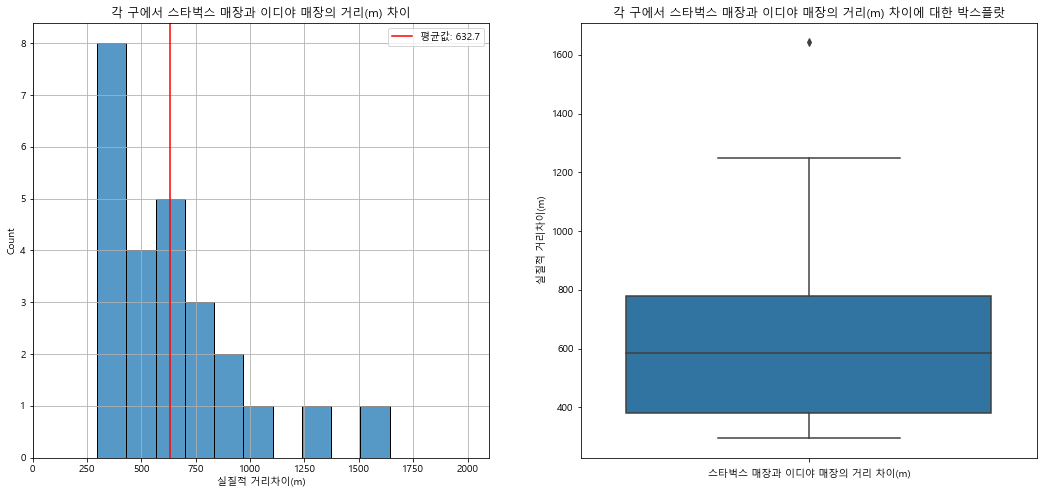

In [ ]:
# 시각화
f,a = plt.subplots(ncols=2,figsize=(18,8))

sns.histplot(to_df["실질적 거리차이(m)"],bins=10,ax=a[0]);

a[0].axvline(to_df["실질적 거리차이(m)"].mean(),0.0001,color="r",label="평균값: {:.1f}".format(to_df["실질적 거리차이(m)"].mean()))
a[0].set_title("각 구에서 스타벅스 매장과 이디야 매장의 거리(m) 차이")
a[0].legend()
a[0].grid(True)
a[0].set_xlim([0,2100])

sns.boxplot(y=to_df["실질적 거리차이(m)"],ax=a[1]);
a[1].set_title("각 구에서 스타벅스 매장과 이디야 매장의 거리(m) 차이에 대한 박스플랏")
a[1].set_xlabel("스타벅스 매장과 이디야 매장의 거리 차이(m)")
plt.show()

히스토그램과 박스플랏을 보았을때, 특정 구들에서는 이디야 매장과 스타벅스 매장의 거리 차이가 먼 것으로 볼 수 있었다. 하지만 히스토그램을 보았을때는 계급이 300일때 빈도가 제일 높고 총 8개 구가 포함됐다. 계급이 올라갈수록 빈도수는 낮아졌다. 그렇기에 위 데이터를 가지고 평균값을 보다는 중간값이 이상적이라고 판단되었습니다.

In [ ]:
# 중간값
print(round(to_df["실질적 거리차이(m)"].median()),"m")

587 m


그래서 다음과 이디야와 스타벅스 매장의 실질적인 거리 차이는 587m이다. 라고 정의하겠습니다.

그러면 수치적으로 나온 거리가 사람들에게 이디야 매장이 스타벅스 매장 주변에 위치하고 있다? 라고 말할 수 있는가에 대해서는 아직 타당한 이유가 부족하다고 생각듭니다. 그래서 이디야 매장과 스타벅스 매장의 경향을 보고 서로 비슷한 경향이고 각 구마다 거리도 비교하여 가설이 타당한지 결론을 짓도록 하겠습니다.

* **1. 구마다의 이디야 매장과 스타벅스 매장에 대한 밀집도 비교**

In [ ]:
df_Ediya["매장이름"] = "이디야"
df_starbucks["매장이름"] = "스타벅스"

In [ ]:
total_df = pd.concat([df_Ediya,df_starbucks[df_Ediya.columns]],axis=0)
total_df.reset_index(drop=True,inplace=True)
total_df

,매장이름,구,주소,위도,경도
0,이디야,강남구,서울 강남구 논현동 230-2,37.509942,127.035705
1,이디야,강남구,"서울 강남구 학동로 338 (논현동, 강남파라곤)",37.516540,127.040162
2,이디야,강남구,서울 강남구 논현로131길 28 (논현동),37.514080,127.028107
3,이디야,강남구,"서울 강남구 역삼로 415 (대치동, 성진빌딩)",37.501289,127.052395
4,이디야,강남구,서울 강남구 도산대로37길 20 (신사동),37.522278,127.031487
...,...,...,...,...,...
1280,스타벅스,중랑구,서울특별시 중랑구 면목로 310,37.579594,127.087966
1281,스타벅스,중랑구,서울특별시 중랑구 망우로 307 (상봉동),37.596890,127.086470
1282,스타벅스,중랑구,"서울특별시 중랑구 동일로 932 (묵동, 묵동자이아파트) (묵동이마트 B1층)",37.613433,127.077484
1283,스타벅스,중랑구,서울특별시 중랑구 동일로 952,37.615368,127.076633


각 구마다 이디야 매장 수와 스타벅스 매장 수를 종합을 해 비교하겠습니다.

In [ ]:
total_group = total_df[["매장이름","구","주소"]].groupby(["구","매장이름"]).agg("count")
total_group.head(5)

주소
구   매장이름    
강남구 스타벅스  87
    이디야   45
강동구 스타벅스  16
    이디야   25
강북구 스타벅스   6

해당 자료를 시각화를 해서 살펴보겠습니다.

In [ ]:
total_group = total_group.reset_index()

total_group.columns = ["구","매장","개수"]
total_group.head()

,구,매장,개수
0,강남구,스타벅스,87
1,강남구,이디야,45
2,강동구,스타벅스,16
3,강동구,이디야,25
4,강북구,스타벅스,6


In [ ]:
total_group.loc[total_group["매장"] =="스타벅스","매장별개수정규화"] = total_group[total_group["매장"] =="스타벅스"]["개수"] / total_group[total_group["매장"] =="스타벅스"]["개수"].max()
total_group.loc[total_group["매장"] =="이디야","매장별개수정규화"] = total_group[total_group["매장"] =="이디야"]["개수"] / total_group[total_group["매장"] =="이디야"]["개수"].max()

In [ ]:
t_star= total_group[total_group["매장"]=="스타벅스"].set_index("구")
t_ed= total_group[total_group["매장"]=="이디야"].set_index("구")

* **스타벅스 밀집도.(그림 1)**

In [ ]:
my_map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=11,
    tiles="Stamen Toner"
)
folium.Choropleth(
    geo_data = geo_str,   # 우리나라 경계선 좌표값이 담긴 데이터
    data = t_star["매장별개수정규화"],
    columns=[t_star.index,t_star["매장별개수정규화"]],
    key_on = "feature.id",
    # 꾸미는 코드
    fill_color = "PuRd",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "서울시 각 구마다 매장에 대한 밀집도"
).add_to(my_map)
for idx, rows in to_df.iterrows():
    
    # location 
    slat, slng = rows.s_위도, rows.s_경도
    
    # Marker 
    folium.Marker(
        location=[slat, slng],
        popup="스타벅스",
        tooltip=rows.구, 
        icon=folium.Icon(
            icon="star",
            color="green",
            icon_color="white",
        )
    ).add_to(my_map)
my_map

* **이디야 밀집도.(그림 2)**

In [ ]:
my_map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=11,
    tiles="Stamen Toner"
)
folium.Choropleth(
    geo_data = geo_str,   # 우리나라 경계선 좌표값이 담긴 데이터
    data = t_ed["매장별개수정규화"],
    columns=[t_ed.index,t_ed["매장별개수정규화"]],
    key_on = "feature.id",
    # 꾸미는 코드
    fill_color = "PuRd",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "서울시 각 구마다 매장에 대한 밀집도"
).add_to(my_map)

for idx, rows in to_df.iterrows():
    
    # location 
    elat, elng = rows.e_위도, rows.e_경도
    
    # Marker 
    folium.Marker(
        location=[elat, elng],
        popup="이디야",
        tooltip=rows.구, 
        icon=folium.Icon(
            icon="home",
            color="darkblue",
            icon_color="white",
        )
    ).add_to(my_map)
my_map

In [ ]:
t_star.loc[t_star["매장별개수정규화"]<0.2 ,"밀집도비교"] = 0
t_star.loc[(t_star["매장별개수정규화"]>0.2) & (t_star["매장별개수정규화"]<0.7) ,"밀집도비교"] = 0.5
t_star.loc[t_star["매장별개수정규화"]>0.7 ,"밀집도비교"] = 1
t_ed.loc[t_ed["매장별개수정규화"]<0.2 ,"밀집도비교"] = 0
t_ed.loc[(t_ed["매장별개수정규화"]>0.2) & (t_ed["매장별개수정규화"]<0.7) ,"밀집도비교"] = 0.5
t_ed.loc[t_ed["매장별개수정규화"]>0.7 ,"밀집도비교"] = 1

In [ ]:
tM = t_star["밀집도비교"] * t_ed["밀집도비교"]

* **스타벅스 이디야가 공통 성향적인 지역의 밀집도.(그림 3)**

In [ ]:
my_map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=11,
    tiles="Stamen Toner"
)
folium.Choropleth(
    geo_data = geo_str,   # 우리나라 경계선 좌표값이 담긴 데이터
    data = tM,
    columns=[t_ed.index,tM],
    key_on = "feature.id",
    # 꾸미는 코드
    fill_color = "PuRd",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "서울시 각 구마다 매장에 대한 밀집도"
).add_to(my_map)

for idx, rows in to_df.iterrows():
    
    # location 
    elat, elng = rows.e_위도, rows.e_경도
    
    # Marker 
    folium.Marker(
        location=[elat, elng],
        popup="이디야",
        tooltip=rows.구, 
        icon=folium.Icon(
            icon="home",
            color="darkblue",
            icon_color="white",
        )
    ).add_to(my_map)
my_map

밀집도를 비교해봤을때, 그림(1) 스타벅스의 경우는 중심가에 밀집도가 높게 배치가 매장이 되어있었다. 반면에 그림(2) 이디야의 경우에는 스타벅스와 유사하게 중심가에 배치가 많았지만, 스타벅스에 비해 밀집도가 골구로 균형있게 배치가 된것을 알 수 있었다. 그림(3)은 사람들이 이디야와 스타벅스가 왜 근처에 있다고 생각할 수 있는지에 대해서 두 매장의 밀집도에 대해 서로 곱해서 서로 성향이 비슷하게 매장이 존재하는지 살펴봤는데, **두 매장이 유동인구가 많은 지역에 매장을 배치하는 것을 알 수 있었다.**

* **앞에서 구한 실질적인 이디야와 스타벅스 매장의 거리를 가지고 분석을 하겠습니다.**
    * 박스플랏에서 75%영역이 지난 구의 특징과 25% 영역보다 작은 구의 특징을 파악해 두 매장의 거리는 587m 차이지만 사람들이 스타벅스 옆에 이디야가 있을거라고 생각하는 이유에 대해 파악 후 결론을 짓겠습니다.

In [ ]:
to_df_75 = to_df[to_df["실질적 거리차이(m)"] > np.percentile(to_df["실질적 거리차이(m)"],75)]
to_df_75

,구,s_위도,s_경도,e_위도,e_경도,실질적 거리차이(m)
6,구로구,37.493494,126.885304,37.495234,126.866819,1642.189348
7,금천구,37.472702,126.889408,37.466484,126.894461,822.710361
9,도봉구,37.648484,127.038251,37.659621,127.040031,1248.201931
13,서대문구,37.563697,126.941757,37.570628,126.937333,863.711689
18,양천구,37.529306,126.866458,37.525750,126.857818,858.447303
21,은평구,37.616958,126.921850,37.608241,126.920226,979.749484


In [ ]:
to_df_25 = to_df[to_df["실질적 거리차이(m)"] < np.percentile(to_df["실질적 거리차이(m)"],25)]
to_df_25

,구,s_위도,s_경도,e_위도,e_경도,실질적 거리차이(m)
1,강동구,37.540972,127.138448,37.543286,127.140141,297.532854
2,강북구,37.633118,127.023404,37.630570,127.022408,296.573595
3,강서구,37.556408,126.842919,37.555583,126.838776,376.498178
5,광진구,37.543299,127.082364,37.546054,127.081552,314.638513
12,마포구,37.554553,126.926180,37.555538,126.922979,302.678940
20,용산구,37.536418,126.977511,37.537717,126.973853,353.460010


위 데이터는 이디야와 스타벅스의 실질적 거리 차이가 75% 초과된 '구'가 있고, 25% 미만으로 가까운 구들이 존재한다. 이 '구'에 대해서 시각화를 해보면 해보겠습니다.

In [ ]:
to_df = to_df.reset_index()

In [ ]:
# to_df["실질적 거리차이(m)_normal"] = 1 - (to_df["실질적 거리차이(m)"] / to_df["실질적 거리차이(m)"].max())

In [ ]:
# 표준화
to_df["실질적 거리차이(m)_normal"] = (to_df["실질적 거리차이(m)"] - to_df["실질적 거리차이(m)"].mean())/to_df["실질적 거리차이(m)"].std()

**그림 4 실질적 거리차이 비교**

In [ ]:
my_map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=12,
    tiles="Stamen Toner"
)

for idx, rows in to_df.iterrows():
    
    # location 
    slat, slng = rows.s_위도, rows.s_경도
    elat, elng = rows.e_위도, rows.e_경도
    
    # Marker 
    folium.Marker(
        location=[slat, slng],
        popup="스타벅스",
        tooltip=rows.구, 
        icon=folium.Icon(
            icon="star",
            color="green",
            icon_color="white",
        )
    ).add_to(my_map)
    
    # Marker 
    folium.Marker(
        location=[elat, elng],
        popup="이디야",
        tooltip=rows.구, 
        icon=folium.Icon(
            icon="home",
            color="darkblue",
            icon_color="white",
        )
    ).add_to(my_map)
    
to_df = to_df.set_index("구")  
folium.Choropleth(
    geo_data = geo_str,   # 우리나라 경계선 좌표값이 담긴 데이터
    data = to_df["실질적 거리차이(m)_normal"],
    columns=[to_df.index,to_df["실질적 거리차이(m)_normal"]],
    key_on = "feature.id",
    # 꾸미는 코드
    fill_color = "PuRd",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "서울시 각 구마다 매장에 대한 밀집도"
).add_to(my_map)

my_map

그림 4를 살펴보았을때 투명한 색은 이디야와 스타벅스 매장이 300m로 가깝운 구들이며 이 구들의 특징은 그림 3에서 봤던 스타벅스와 이디야의 매장의 갯수에 대한 공통적으로 밀집도가 높은 곳을 가리키는데 현재 투명한 색들이 공통적으로 밀집도가 높은 지역을 가리킨다. 그렇기 때문에 사람들이 사람들이 유동인구가 많은 중심가에서 이동하다가 스타벅스를 보고 몇 분 안에 이디야를 볼 수 있어서 이디야 매장이 스타벅스 매장 주변에 있다고 인식하는것 같다.

반대로 유동인구가 적고 중심가가 아니면 스타벅스 매장의 밀집도는 떨어진다. 하지만 이디야의 경우 중심가와 멀어져도 균형있게 밀집도를 이룬다. 그렇기 때문에 이 구들의 특징은 스타벅스와 이디야의 매장은 멀리 떨어져있다라고 볼 수 있다.

---
## 결론.

**스타벅스 매장**의 경우 **중심가에 밀집도가 높게 배치**되어있고, 특히 스타벅스는 **도로가 앞에 매장들을 배치**한다. 반대로 **이디야**의 경우는 스타벅스와 유사하게 중심가에 밀집도이 높게 배치되어있지만 **스타벅스와 다르게 중심가가 아닌 구도 적절히 배치**가 되어있다. 그렇기 때문에 `통계적인 두 카페의 거리 차이는 약 587m이지만 중심가에 가까운 구일수록 약 300m정도 차이가 발생하고 중심가에서 먼 카페는 1km 정도 멀리 떨어져` 있는 것을 알 수 있었다. **최종적으로 이디야와 스타벅스는 중심가 일수록 근처에 배치가 되어있고, 중심가에서 멀어질수록 두 카페는 멀리 떨어져있다.**라고 말할 수 있겠습니다.